In [ ]:
%cd ../..
# %pip install .
import time
from os import environ
# ego = Car on drivableRoad,
#         facing Range(-15, 15) deg relative to roadDirection,
#         with visibleDistance 50, 
#         with viewAngle 135 deg
# ped = Pedestrian on roadsOrIntersections,
#         with regionContainedIn roadRegion,
#         facing Range(-180, 180) deg

# require abs(relative heading of ped from ego) > 70 deg

In [ ]:
if "AP_PORT" not in environ:
    environ["AP_PORT"] = str(input('port'))
# README command uses port=25432

In [ ]:
from apperception.world import empty_world
from apperception.database import database
from apperception.utils import F
from apperception.predicate import objects, camera, lit
database.connection

<connection object at 0x7f3784aae7c0; dsn: 'user=docker password=xxx dbname=mobilitydb host=localhost port=25442', closed: 0>

In [ ]:
name = 'ScenicWorld' # world name
world = empty_world(name=name)

o = objects[0]
c = camera
world = world.filter(
    F.like(o.type, lit('human.pedestrian%')) &
    F.contained(c.ego, F.road_segment('road')) &
    (F.contained_margin(o.bbox@c.time, F.road_segment('road'), lit(0.50)) | F.contained(o.trans@c.time, F.road_segment('road'))) &
    F.angle_excluding(F.facing_relative(o.traj@c.time, c.ego), lit(-70), lit(70)) &
    F.angle_between(F.facing_relative(c.ego, F.road_direction(c.ego, c.ego)), lit(-15), lit(15)) &
    (F.distance(c.camAbs, o.traj@c.time) < lit(50)) &
    (F.view_angle(o.trans@c.time, c.camAbs) < lit(35))
)

start = time.time()
# keys = world.get_traj_key()
id_time_camId_filename = world.get_id_time_camId_filename(num_joined_tables=1)

end = time.time()
print(format(end-start))

execute: filter
execute: get_id_time_camId_filename
get_id_time_camId_filename 
        SELECT t0.itemId, cameras.timestamp, cameras.cameraId, cameras.filename
        FROM (SELECT * FROM item_general_trajectory) as t0
        
        JOIN Cameras USING (cameraId)
        WHERE (t0.objectType LIKE 'human.pedestrian%' AND contained(egoTranslation,roadSegment('road')) AND (containedMargin(objectBBox(t0.itemId, timestamp),roadSegment('road'),0.5) OR contained(valueAtTimestamp(t0.translations,timestamp),roadSegment('road'))) AND angleExcluding(facingRelative((valueAtTimestamp(t0.itemHeadings,timestamp))::real, egoHeading),-70,70) AND angleBetween(facingRelative(egoHeading, roadDirection(egoTranslation,egoHeading)),-15,15) AND (distance(cameraTranslationAbs,valueAtTimestamp(t0.trajCentroids,timestamp))<50) AND (viewAngle(valueAtTimestamp(t0.translations,timestamp),cameraHeading,cameraTranslationAbs)<35))
        
done execute node
Result length: 84
10.381219387054443


In [ ]:
resultImages = dict() # maping from image -> (itemId, timestamp, camId) that it was found at
for result in id_time_camId_filename:
    itemId, timestamp, camId, filename = result
    filename = filename.split("/")[-1] # use split so that prefix path is not included in filename
    resultImages[filename] = (itemId, timestamp, camId)

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import random

# experiment_data_dir =  "data/nuscenes/experiment_data"
experiment_data_dir = '/work/apperception/data/nuScenes/full-dataset-v1.0/Trainval/experiment_data'
def show_images(images, sample=None):
    if sample is not None:
        images = [i for i in images]
        random.shuffle(images)
        images = images[:sample]
    
    plt.figure(figsize=(60,30))
    columns = 3

    for i, image in enumerate(images):
        print("image", image)
        img = mpimg.imread(os.path.join(experiment_data_dir, image))
        print("loaded")
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(img)

In [ ]:
# show_images(list(resultImages.keys()), sample=10)

In [ ]:
expected_imgs = [
    'n008-2018-05-21-11-06-59-0400__CAM_FRONT__1526915471412465.jpg',
    'n008-2018-07-27-12-07-38-0400__CAM_FRONT__1532707917112404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385153162404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385153662404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385154162404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385154662404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385155162404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385158662404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385159162404.jpg',
    'n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385159662404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656805162404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656805662415.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656806162404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656806612404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656807162404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656807662404.jpg',
    'n008-2018-08-30-15-16-55-0400__CAM_FRONT__1535656808162404.jpg',
    'n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659404362404.jpg',
    'n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659404762404.jpg',
    'n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659405262404.jpg',
    'n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659405762404.jpg',
    'n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659406262404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535728830362404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729326412404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729326912404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729327412404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729327912404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729328412404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729328912404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729329412404.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729329912795.jpg',
    'n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729330362404.jpg',
    'n008-2018-08-31-11-37-23-0400__CAM_FRONT__1535730293412404.jpg',
    'n008-2018-08-31-11-56-46-0400__CAM_FRONT__1535731236162404.jpg',
    'n008-2018-08-31-11-56-46-0400__CAM_FRONT__1535731236662404.jpg',
    'n008-2018-08-31-11-56-46-0400__CAM_FRONT__1535731237112404.jpg',
    'n008-2018-08-31-11-56-46-0400__CAM_FRONT__1535731237612404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293291162404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293291662404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293292162404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293292662404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293293162404.jpg',
    'n008-2018-09-18-13-41-50-0400__CAM_FRONT__1537293293662404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299143862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299144362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299144862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299145362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299145862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299146362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299146862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299147362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299147862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299148362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299148862404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299149412404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299229362404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299239112404.jpg',
    'n008-2018-09-18-15-26-58-0400__CAM_FRONT__1537299240112404.jpg',
]

In [ ]:
# show_images(expected_imgs, sample=10)

Percentage of expected results missing from query:  3 / 58 = 5.172413793103448 %
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729326412404.jpg
loaded
image n008-2018-08-27-11-48-51-0400__CAM_FRONT__1535385153162404.jpg
loaded
image n008-2018-08-30-15-52-26-0400__CAM_FRONT__1535659406262404.jpg
loaded


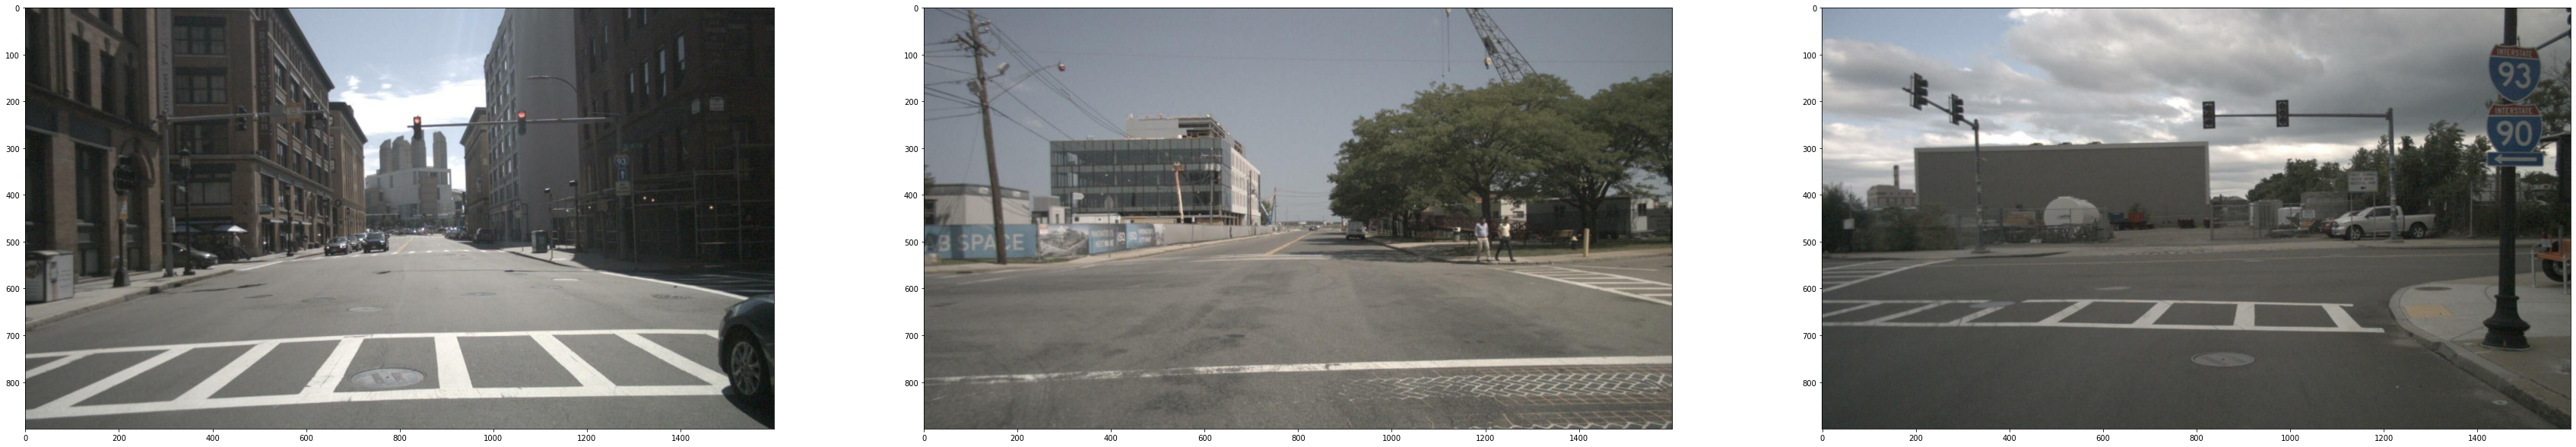

In [ ]:
missing = 0
missing_images = []
for expected_img in expected_imgs:
    if expected_img not in resultImages.keys():
        missing += 1
        missing_images.append(expected_img)
print("Percentage of expected results missing from query: ", missing, "/", len(expected_imgs), "=", 100 * missing / len(expected_imgs), "%")
show_images(missing_images, sample=10)

Percentage of images in query but not in expected results:  18 / 73 = 24.65753424657534 %
image n008-2018-09-18-12-53-31-0400__CAM_FRONT__1537290189512404.jpg
loaded
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729277012404.jpg
loaded
image n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151593362404.jpg
loaded
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729281512404.jpg
loaded
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729333362404.jpg
loaded
image n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151206412404.jpg
loaded
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729332862404.jpg
loaded
image n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151592862404.jpg
loaded
image n008-2018-09-18-13-10-39-0400__CAM_FRONT__1537291131412404.jpg
loaded
image n008-2018-08-31-11-19-57-0400__CAM_FRONT__1535729333912404.jpg
loaded


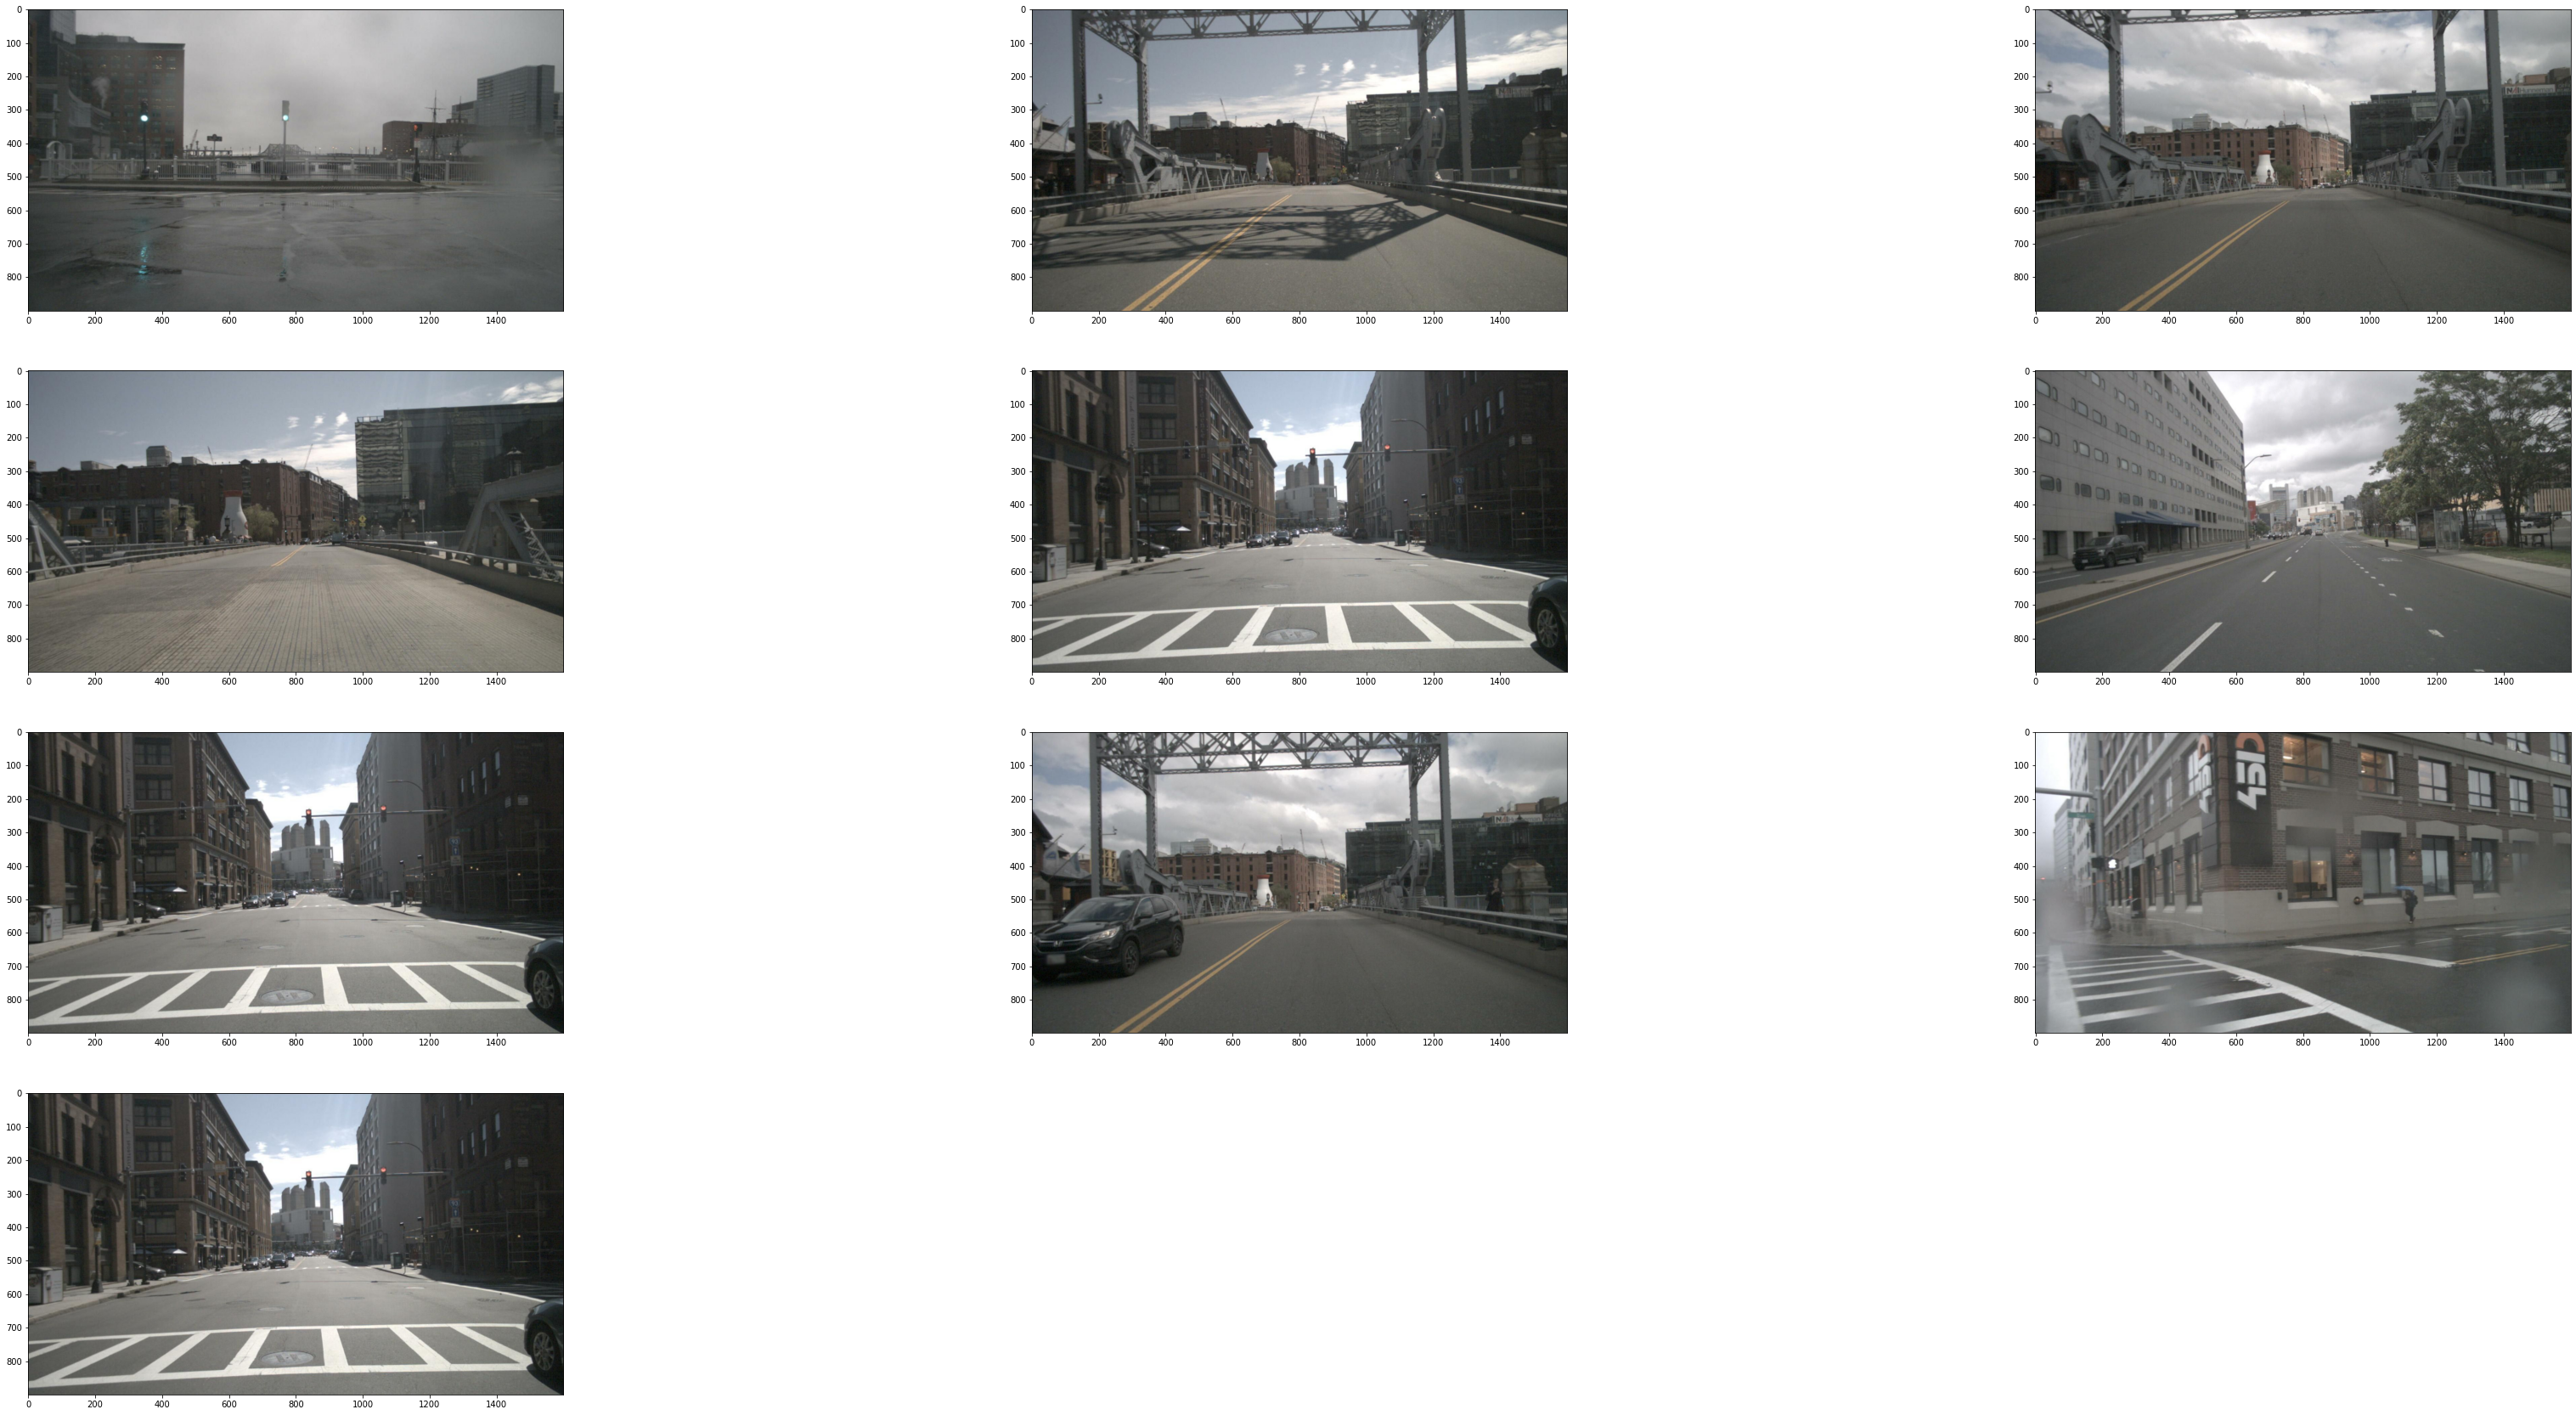

In [ ]:
extra = 0
extra_images = {}
for img in resultImages.keys():
    if img not in expected_imgs:
        extra += 1
        extra_images[img] = resultImages[img]
print("Percentage of images in query but not in expected results: ", extra, "/", len(resultImages.keys()), "=", 100 * extra / len(resultImages.keys()), "%")
show_images(extra_images.keys(), sample=10)

In [12]:
######## Getting info about tthe extra images ########

In [13]:
from apperception.database import database
for img in extra_images:
    itemId, timestamp, camId = extra_images[img]
    prefix = "samples/CAM_FRONT/"
    query = f"SELECT viewAngle(table_0.translations, Cameras.cameraHeading, Cameras.cameraTranslationAbs, Cameras.timestamp), \'Cameras: \', Cameras.filename, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.egoHeading, \'Ego Translation: \', ST_X(Cameras.egoTranslation), ST_Y(Cameras.egoTranslation), ST_Z(Cameras.egoTranslation), \'Cam Translation: \', ST_X(Cameras.cameraTranslationAbs), ST_Y(Cameras.cameraTranslationAbs), ST_Z(Cameras.cameraTranslationAbs), \'Pedestrian: \',table_0.itemId, getX(table_0.trajCentroids, Cameras.timestamp), getY(table_0.trajCentroids, Cameras.timestamp), ST_Z(valueAtTimestamp(table_0.trajCentroids, Cameras.timestamp)), valueAtTimestamp(table_0.itemHeadings, Cameras.timestamp), roadDirection(CAST(getX(table_0.trajCentroids, Cameras.timestamp) AS real), CAST(getY(table_0.trajCentroids, Cameras.timestamp) AS real), -9.99) FROM Item_General_Trajectory AS table_0, Cameras" + \
                f" WHERE Cameras.filename = \'{prefix + img}\' AND table_0.itemId = \'{itemId}\'"
    result = database._execute_query(query)
    print(result)

UndefinedFunction: function getx(tgeompoint, timestamp with time zone) does not exist
LINE 1: ...raTranslationAbs), 'Pedestrian: ',table_0.itemId, getX(table...
                                                             ^
HINT:  No function matches the given name and argument types. You might need to add explicit type casts.


In [ ]:
######## Seeing what predicates are not being satisfied for missing images ########

In [ ]:
# We assume for now that there is no problem with the commented out predicates, since they are relativley simple
predicates = [
    # "(table_0.objectType LIKE 'human.pedestrian%')",
    "contained(Cameras.egoTranslation, roadSegment('road'))",
    "(contained(table_0.translations, roadSegment('road'), Cameras.timestamp) OR contained(table_0.translations, roadSegment('intersection'), Cameras.timestamp))",
    "(containedMargin(objectBBox(table_0.itemId, Cameras.timestamp), roadSegment('road'), 0.60, Cameras.timestamp) OR containedMargin(objectBBox(table_0.itemId, Cameras.timestamp), roadSegment('intersection'), 0.5, Cameras.timestamp))",
    "angleExcluding(facingRelative(table_0.itemHeadings, Cameras.egoHeading, Cameras.timestamp), (-70), 70)",
    "angleBetween(facingRelative(Cameras.egoHeading, roadDirection(Cameras.egoTranslation, Cameras.timestamp, Cameras.egoHeading), Cameras.timestamp), (-15), 15)",
    # "(distance(Cameras.egoTranslation, table_0.trajCentroids, Cameras.timestamp)<50)",
    # "(viewAngle(table_0.trajCentroids, Cameras.egoHeading, Cameras.egoTranslation, Cameras.timestamp)<135)"
    
]

In [ ]:
from apperception.database import database
preds_missed = {}
for img in missing_images:    
    prefix = "samples/CAM_FRONT/"
    query = f"SELECT COUNT(*) FROM Item_General_Trajectory AS table_0, Cameras" + \
                f" WHERE Cameras.filename = \'{prefix + img}\' AND (table_0.objectType LIKE 'human.pedestrian%') AND (distance(Cameras.cameraTranslationAbs, table_0.trajCentroids, Cameras.timestamp)<50) AND (viewAngle(table_0.trajCentroids, Cameras.egoHeading, Cameras.cameraTranslationAbs, Cameras.timestamp)<135)" 
    database.cursor.execute(query)
    result = database.cursor.fetchall()
    num_peds = result[0][0]
    # For now we only take a look at images with one pedestrian (so that we know that that one pedestrian is the one that is supposed to satisfy the condition)
    # (if still experiencing problems after fixing the errors with the images with only one pedestrian, we can expand)
    if num_peds != -1:
        # print("------", img, "------")
        for predicate in predicates:
            prefix = "samples/CAM_FRONT/"
            query = f"SELECT true FROM Item_General_Trajectory AS table_0, Cameras" + \
                        f" WHERE Cameras.filename = \'{prefix + img}\' AND (table_0.objectType LIKE 'human.pedestrian%') AND (distance(Cameras.egoTranslation, table_0.trajCentroids, Cameras.timestamp)<50) AND (viewAngle(table_0.trajCentroids, Cameras.egoHeading, Cameras.egoTranslation, Cameras.timestamp)<35) AND " + \
                        predicate 
            result = database._execute_query(query)
            print(result)
            # if the predictae was not satisfied
            if len(result) == 0: 
                if predicate not in preds_missed:
                    preds_missed[predicate] = 0
                preds_missed[predicate] += 1
                print(predicate)
                query = f"SELECT {predicate}, Cameras.filename, table_0.itemId, objectBBox(table_0.itemId, Cameras.timestamp), ST_Area(objectBBox(table_0.itemId, Cameras.timestamp)::box3d::geometry) FROM Item_General_Trajectory AS table_0, Cameras" + \
                        f" WHERE Cameras.filename = \'{prefix + img}\' AND (table_0.objectType LIKE 'human.pedestrian%') AND (distance(Cameras.egoTranslation, table_0.trajCentroids, Cameras.timestamp)<50) AND (viewAngle(table_0.trajCentroids, Cameras.egoHeading, Cameras.egoTranslation, Cameras.timestamp)<35)" 
                result = database._execute_query(query)
                print(result)

            

In [ ]:
for pred in preds_missed:
    print(pred, preds_missed[pred])